<a href="https://colab.research.google.com/github/AminTurmudiYusup/machine_learning_task/blob/master/task3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from google.colab import files

%precision %.4f

import warnings
warnings.filterwarnings('ignore')

uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


**1. Прочитать данные из файла**

In [2]:
df=pd.read_csv('diabetes.csv')
df.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,25.19,6.6,140,0
1,0,54.0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,23.45,5.0,155,0
4,1,76.0,1,1,20.14,4.8,155,0


2. Основная информация о данных

In [3]:
# Data overview
print("Dataset Shape:", df.shape) #Дайте нам информацию о количестве строк и столбцов DataFrame
print("\nData Types:\n", df.dtypes) #Дайте нам информацию о типе данных

Dataset Shape: (1000, 8)

Data Types:
 gender                   int64
age                    float64
hypertension             int64
heart_disease            int64
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object


**3. Очистка данных**

In [4]:
# 1. Check for missing values
print("Missing values per column:\n", df.isnull().sum())
df = df.drop_duplicates()
def fill_missing_with_median_or_mean(df):
    for column in df.columns:
        if df[column].isnull().any():
            if abs(df[column].skew()) > 0.5:
                df[column].fillna(df[column].median(), inplace=True)
                print(f"Filled missing values in '{column}' with median")
            else:
                df[column].fillna(df[column].mean(), inplace=True)
                print(f"Filled missing values in '{column}' with mean")

fill_missing_with_median_or_mean(df)
print("\nData after filling missing values:\n", df)

Missing values per column:
 gender                 0
age                    0
hypertension           0
heart_disease          0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

Data after filling missing values:
      gender   age  hypertension  heart_disease    bmi  HbA1c_level  \
0         0  80.0             0              1  25.19          6.6   
1         0  54.0             0              0  27.32          6.6   
2         1  28.0             0              0  27.32          5.7   
3         0  36.0             0              0  23.45          5.0   
4         1  76.0             1              1  20.14          4.8   
..      ...   ...           ...            ...    ...          ...   
995       1  62.0             0              0  29.26          5.0   
996       0  44.0             0              0  46.07          5.0   
997       1  21.0             0              0  31.44          6.2   
998       1  45.0     

**4. Исследовательский анализ данных (EDA)**
**:** Если DataFrame содержит числовые данные, описание содержит следующую информацию для каждого столбца: среднее значение, стандартное отклонение, минимум, 25%, 50%, ,75%, макс.

In [5]:
print("Calculate between have disease or not : ", df.diabetes.value_counts())
print("\nSummary Statistics:\n", df.describe())

Calculate between have disease or not :  diabetes
0    918
1     82
Name: count, dtype: int64

Summary Statistics:
             gender          age  hypertension  heart_disease          bmi  \
count  1000.000000  1000.000000   1000.000000    1000.000000  1000.000000   
mean      0.411000    41.273680      0.068000       0.032000    26.959350   
std       0.492261    22.909619      0.251872       0.176088     6.786204   
min       0.000000     0.080000      0.000000       0.000000    10.300000   
25%       0.000000    22.750000      0.000000       0.000000    22.947500   
50%       0.000000    42.000000      0.000000       0.000000    27.320000   
75%       1.000000    59.000000      0.000000       0.000000    29.065000   
max       1.000000    80.000000      1.000000       1.000000    69.370000   

       HbA1c_level  blood_glucose_level     diabetes  
count  1000.000000          1000.000000  1000.000000  
mean      5.559500           138.419000     0.082000  
std       1.098479       

**5. Визуализация**

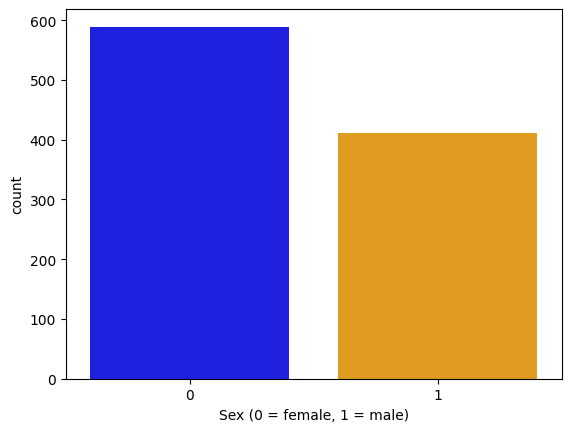

In [6]:
sns.countplot(x='gender', data=df, palette=["blue", "orange"])
plt.xlabel("Sex (0 = female, 1 = male)")
plt.show()

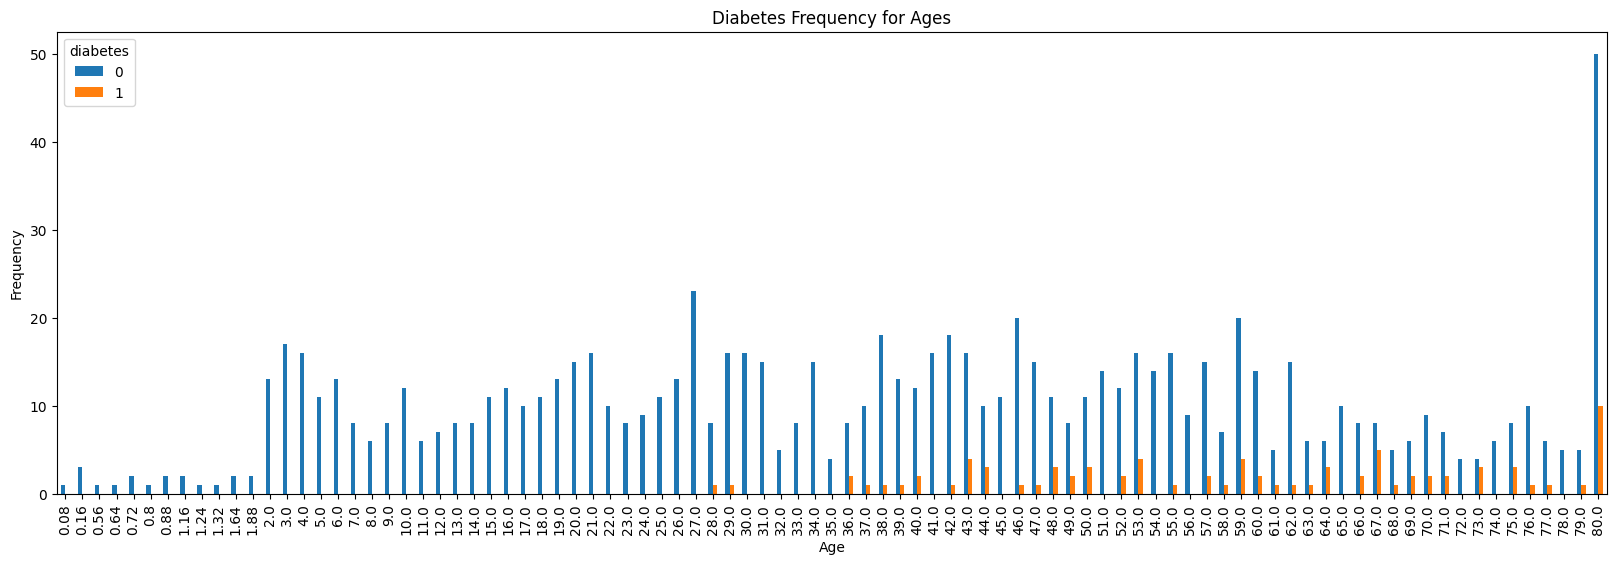

In [7]:
pd.crosstab(df.age,df.diabetes).plot(kind="bar", figsize=(20, 6))
plt.title('Diabetes Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

6. Разделение данных на признаки и цели

In [8]:
from sklearn.model_selection import train_test_split

df = pd.get_dummies(df, columns=['gender'])
X = df.drop('diabetes', axis=1)
y = df['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**7. Масштабирование данных**

In [9]:
from sklearn.preprocessing import StandardScaler



scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**8. Построение множественной модели: логистическая регрессия, опорная векторная машина (SVM), наивный байесовский алгоритм, дерево решений и knn, сравнение всех обученных моделей, построение их матриц путаницы и выполнение  кросс-валидацию**

Confusion Matrix for Logistic Regression:
[[183   1]
 [  4  12]]


Confusion Matrix for SVM:
[[184   0]
 [  7   9]]


Confusion Matrix for KNN:
[[184   0]
 [  9   7]]


Confusion Matrix for Naive Bayes:
[[171  13]
 [  4  12]]


Confusion Matrix for Decision Tree:
[[179   5]
 [  5  11]]


                     Accuracy  Precision  Recall  F1 Score
Logistic Regression     0.975   0.923077  0.7500  0.827586
SVM                     0.965   1.000000  0.5625  0.720000
KNN                     0.955   1.000000  0.4375  0.608696
Naive Bayes             0.915   0.480000  0.7500  0.585366
Decision Tree           0.950   0.687500  0.6875  0.687500






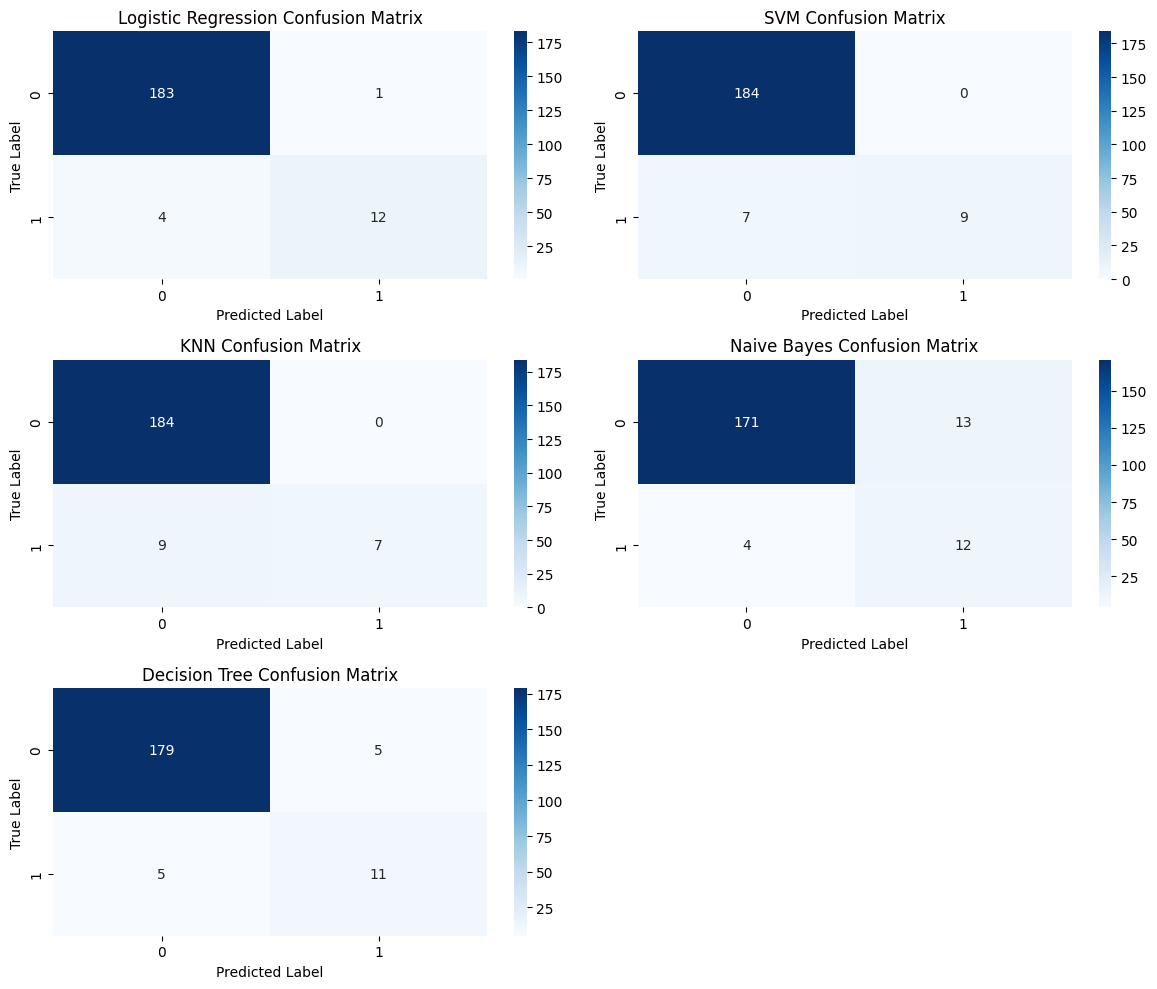

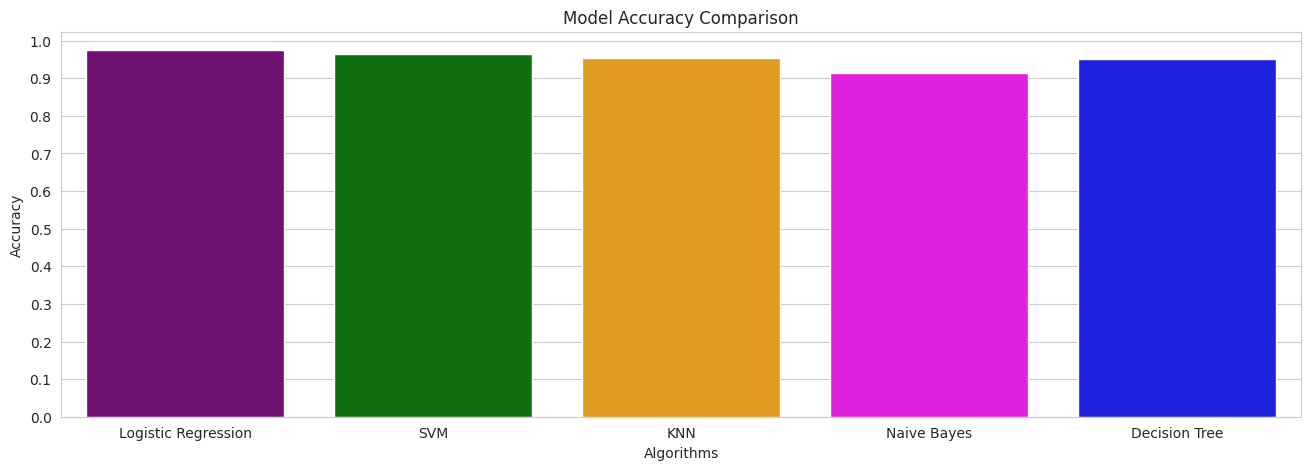

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Define models to evaluate
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier()
}

# Dictionaries to store evaluation metrics and confusion matrices
results = {}
confusion_matrices = {}

# Evaluate each model
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Collect evaluation metrics
    results[model_name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    }

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices[model_name] = cm

    # Print confusion matrix
    print(f"Confusion Matrix for {model_name}:")
    print(cm)
    print("\n")

# Display the results as a DataFrame
results_df = pd.DataFrame(results).T
print(results_df)
print("\n")
print("\n")

# Extract accuracy scores for each model for plotting
accuracies = {model_name: metrics["Accuracy"] for model_name, metrics in results.items()}

# Visualize the confusion matrices in their own figure with spacing
plt.figure(figsize=(12, 10))
for i, (model_name, cm) in enumerate(confusion_matrices.items(), 1):
    plt.subplot(3, 2, i)  # Adjust subplot dimensions if you have more than 5 models
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
plt.tight_layout()  # Ensures that subplots are spaced properly
plt.show()

print("\n")
print("\n")

# Create a new figure for the accuracy bar plot
plt.figure(figsize=(16, 5))
colors = ["purple", "green", "orange", "magenta", "blue"]
sns.set_style("whitegrid")
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylabel("Accuracy")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.title("Model Accuracy Comparison")
plt.show()


**9. Реализуйте другой метод классификации и добавьте его в сравнение (SVC)**

Confusion Matrix for Logistic Regression:
[[183   1]
 [  4  12]]


Confusion Matrix for SVM:
[[184   0]
 [  7   9]]


Confusion Matrix for KNN:
[[184   0]
 [  9   7]]


Confusion Matrix for Naive Bayes:
[[171  13]
 [  4  12]]


Confusion Matrix for Decision Tree:
[[179   5]
 [  5  11]]


Confusion Matrix for SVC_Manual:
[[  0 184]
 [  0  16]]


                     Accuracy  Precision  Recall  F1 Score
Logistic Regression     0.975   0.923077  0.7500  0.827586
SVM                     0.965   1.000000  0.5625  0.720000
KNN                     0.955   1.000000  0.4375  0.608696
Naive Bayes             0.915   0.480000  0.7500  0.585366
Decision Tree           0.950   0.687500  0.6875  0.687500
SVC_Manual              0.080   0.080000  1.0000  0.148148






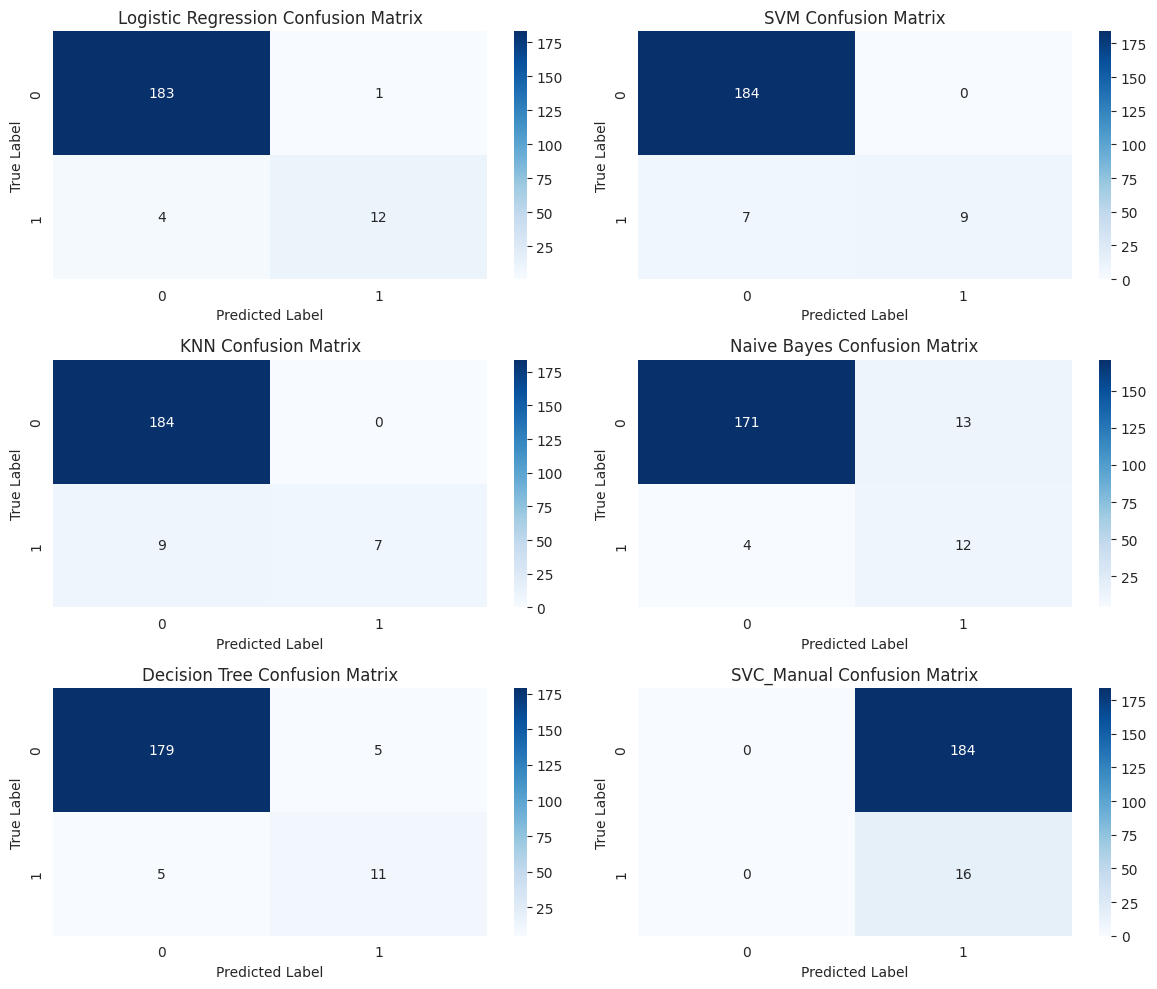

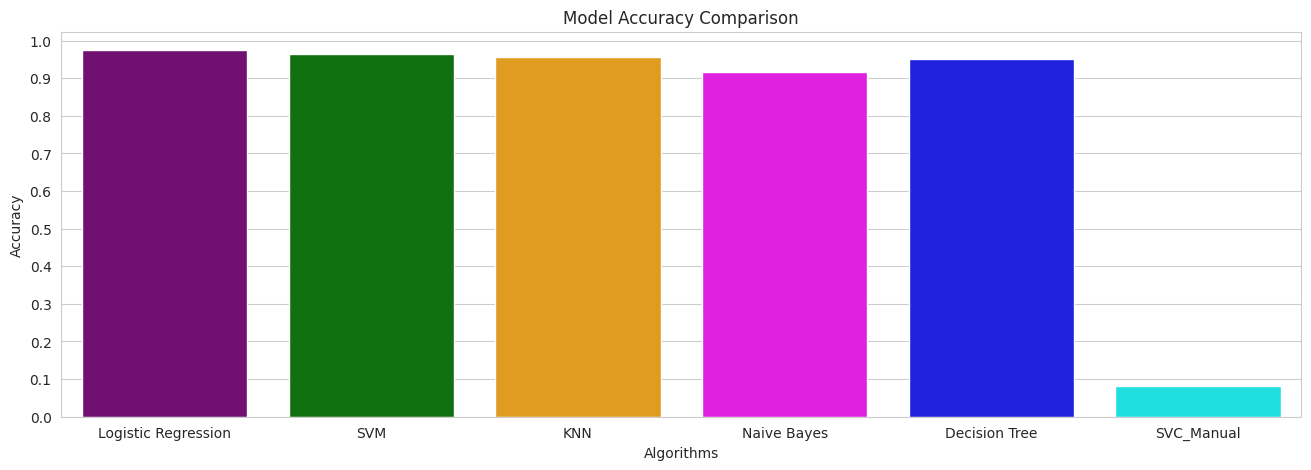

In [11]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Define your custom SVC_Manual class
class SVC_Manual:
    def __init__(self, learning_rate=0.001, regularization_param=0.01, max_iters=1000):
        self.learning_rate = learning_rate
        self.regularization_param = regularization_param
        self.max_iters = max_iters

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0
        for _ in range(self.max_iters):
            for i in range(n_samples):
                condition = y[i] * (np.dot(X[i], self.w) + self.b) >= 1
                if condition:
                    self.w -= self.learning_rate * (2 * self.regularization_param * self.w)
                else:
                    self.w -= self.learning_rate * (2 * self.regularization_param * self.w - np.dot(X[i], y[i]))
                    self.b -= self.learning_rate * y[i]

    def predict(self, X):
        return np.sign(np.dot(X, self.w) + self.b)

# Split your data into features (X) and target (y)
X = df.drop('diabetes', axis=1)  # Features
y = df['diabetes']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert y_train labels to -1 and 1 for SVC_Manual
y_train_svc = y_train.replace({0: -1, 1: 1}).values

# Define the models
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVC_Manual": SVC_Manual(learning_rate=0.01, regularization_param=0.01, max_iters=10000)
}

# Dictionary to store evaluation metrics and confusion matrices
results = {}
confusion_matrices = {}

# Evaluate each model
for model_name, model in models.items():
    # Train the model differently if it's SVC_Manual
    if model_name == "SVC_Manual":
        model.fit(X_train_scaled, y_train_svc)
        y_pred = model.predict(X_test_scaled)
        # Convert predictions back to 0 and 1 for evaluation
        y_pred = np.where(y_pred == -1, 0, 1)
    else:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

    # Collect evaluation metrics
    results[model_name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    }

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices[model_name] = cm

    # Print confusion matrix
    print(f"Confusion Matrix for {model_name}:")
    print(cm)
    print("\n")

# Display the results as a DataFrame
results_df = pd.DataFrame(results).T
print(results_df)

print("\n")
print("\n")


# Extract accuracy scores for the bar plot
accuracies = {model_name: metrics["Accuracy"] for model_name, metrics in results.items()}

# Plot confusion matrices
plt.figure(figsize=(12, 10))
for i, (model_name, cm) in enumerate(confusion_matrices.items(), 1):
    plt.subplot(3, 2, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")

plt.tight_layout()
plt.show()

print("\n")
print("\n")

# Plot accuracy bar plot
colors = ["purple", "green", "orange", "magenta", "blue", "cyan"]
sns.set_style("whitegrid")
plt.figure(figsize=(16, 5))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylabel("Accuracy")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.title("Model Accuracy Comparison")
plt.show()


**Заключение:**

По результатам, Logistic Regression  является лучшей моделью с точки зрения точности, достоверности, полноты и оценки F1. Она стабильно работает лучше других моделей по всем показателям.

Как выбрать лучшую модель:
Если точность является вашей основной метрикой: выберите Logistic Regression  (0.975).
Если важнее баланс между точностью и полнотой (и минимизация как ложных положительных, так и ложных отрицательных результатов): Logistic Regression  по-прежнему является лучшей, но SVM также является сильным претендентом с хорошей точностью и полнотой.